In [ ]:
import zipfile
import os

# Path to the uploaded zip file
#zip_file_path = "sample_data/stock_dataset_separated.zip"
zip_file_path = "data/Cleaned_Data.zip"

# Directory to extract the files
extract_dir = "sample_data/Data/extract"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print(f"Extracted files: {extracted_files}")


Extracted files: ['000001_SS.csv', 'ssmi.csv', '399001_SZ.csv', 'n225.csv', 'J203_J0.csv', 'twii.csv', 'all_stocks.csv', 'hsi.csv', 'ks11.csv', 'gdaxi.csv', 'ixic.csv', 'n100.csv', 'nya.csv', 'nsei.csv', 'data', '.ipynb_checkpoints', 'gsptse.csv']


In [ ]:
#This will clean the data
import os
import pandas as pd
import numpy as np


def clean_data_train(df, filename, directory):
    # Drop rows with missing data across all columns, and drop data between 2014 and 2018
    df = df.dropna()
    df = df.drop(df.columns[0], axis=1)

    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # Convert to datetime, handling invalid dates
        df = df[(df["Date"].dt.year >= 2014) & (df["Date"].dt.year <= 2018)]  # Keep rows with years between 2014 and 2018

    # Normalize data
    df = normalize_data(df)

    df.to_csv(os.path.join(directory, "train_" + filename), header=True, index=False)

    #return df

def clean_data_test(df, filename, directory):
    # Drop rows with missing data across all columns, and drop data between 2019 and 2020
    df = df.dropna()
    df = df.drop(df.columns[0], axis=1)

    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # Convert to datetime, handling invalid dates
        df = df[(df["Date"].dt.year >= 2019) & (df["Date"].dt.year <= 2020)]  # Keep rows with year >= 2014

    # Normalize data
    df = normalize_data(df)

    df.to_csv(os.path.join(directory, "test_" + filename), header=True, index=False)

    #return df

def clean_data_val(df, filename, directory):
    # Drop rows with missing data across all columns, and drop data before the year 2014
    df = df.dropna()
    df = df.drop(df.columns[0], axis=1)

    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # Convert to datetime, handling invalid dates
        df = df[df["Date"].dt.year == 2020]  # Keep rows with year == 2020

    # Normalize data
    df = normalize_data(df)

    df.to_csv(os.path.join(directory, "val_" + filename), header=True, index=False)

    #return df


def normalize_data(df):
    # apply normalization techniques
    for column in df.columns[2:]:  # Start from index 2 to exclude 'Index' and 'Date'
        # Check if the column contains datetime or timedelta data
        if df[column].dtype.kind in ('m', 'M'):  # 'm' for timedelta, 'M' for datetime
            continue  # Skip normalization for datetime/timedelta columns

        # Handle potential NaT values by replacing them with column mean
        # if df[column].dtype.kind in ('f', 'i'):  # Check for numeric columns
        df[column] = df[column].fillna(df[column].mean())  # Replace NaT with mean

        # Continue with normalization
        df[column] = (df[column] - df[column].min()) / (
                df[column].max() - df[column].min())

    return df



directory = "data"
for filename in os.listdir("data"):
    if not filename.endswith(".csv"):
        continue
    f = os.path.join(directory, filename)
    if (filename == 'gsptse.csv'):
        df = pd.read_csv(f)
        df.columns = ["Index", "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
        clean_data_train(df, filename, directory)
        clean_data_test(df, filename, directory)
        clean_data_val(df, filename, directory)




In [ ]:
import pandas as pd
import os

# Directory containing the extracted files
data_dir = "data"

# Dictionary to hold the stock datasets
stock_data = {}

# Load each CSV file into a Pandas DataFrame
for file_name in os.listdir(data_dir):
    if not file_name.endswith('.csv'):
        continue  # Skip non-CSV files
    stock_name = os.path.splitext(file_name)[0]  # Get the file name without extension
    file_path = os.path.join(data_dir, file_name)  # Full path to the file
    stock_data[stock_name] = pd.read_csv(file_path)  # Load CSV into DataFrame

# Check if the data has been loaded correctly (display first few rows of one dataset)
print(stock_data[stock_name].head())


         Date         Open      High       Low     Close  Adj Close    Volume
0  2014-01-02  13621.40039  0.362906  0.398782  0.370658   0.370658  0.109539
1  2014-01-03  13594.20020  0.357062  0.397484  0.361069   0.361069  0.097305
2  2014-01-06  13548.90039  0.349842  0.387780  0.349766   0.349766  0.129559
3  2014-01-07  13495.09961  0.361982  0.392153  0.371230   0.371230  0.159343
4  2014-01-08  13596.90039  0.366730  0.410463  0.374976   0.374976  0.171993


In [ ]:
'''
# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

def split_data(df, train_ratio, val_ratio):
    """
    Splits the data into training, validation, and testing sets.
    """

    # Shuffle the data for randomness
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Calculate split indices
    train_size = int(len(df) * train_ratio)
    val_size = int(len(df) * val_ratio)


    # Perform the splits

    train_data = df.iloc[:train_size]
    val_data = df.iloc[train_size:train_size + val_size]
    test_data = df.iloc[train_size + val_size:]

    return train_data, val_data, test_data

# Example: Split the 'gdaxi' dataset
#gdaxi_df = stock_data['gdaxi']  # Load 'gdaxi' DataFrame
#train_gdaxi, val_gdaxi, test_gdaxi = split_data(gdaxi_df, train_ratio, val_ratio)

# Print sizes of each split
#print(f"Train size: {len(train_gdaxi)}, Validation size: {len(val_gdaxi)}, Test size: {len(test_gdaxi)}")
'''


In [ ]:
# Initialize dictionary to store split datasets
train_data = {}
val_data = {}
test_data = {}

directory = "data"
filename = "gsptse.csv"
f_train = os.path.join(directory, "train_" + filename)
f_test = os.path.join(directory, "test_" + filename)
f_val = os.path.join(directory, "val_" + filename)
df_train = pd.read_csv(f_train)
df_test = pd.read_csv(f_test)
df_val = pd.read_csv(f_val)

# Loop through each file in the stock dataset folder
#for stock_name, df in stock_data.items():
    # Split each stock data into train, val, test
    #train, val, test = split_data(df, train_ratio, val_ratio)

    # Store the datasets in respective dictionaries
train_data[stock_name] = df_train
val_data[stock_name] = df_val
test_data[stock_name] = df_test

    # Print the sizes of the splits for verification
print(f"{stock_name} - Train size: {len(df_train)}, Validation size: {len(df_val)}, Test size: {len(df_test)}")


train_gsptse - Train size: 1254, Validation size: 252, Test size: 503


In [ ]:
def preprocess_data(df, scaler, look_back=60):
    """
    Prepares the data for the LSTM model by creating sequences.
    df: DataFrame containing stock data.
    scaler: Fitted MinMaxScaler instance for consistent scaling.
    look_back: Number of previous days to use for prediction.
    """
    # Normalize the data using the provided scaler, ensuring DataFrame input
    scaled_data = scaler.transform(df[['Close']])  # Use DataFrame for transformation

    # Create sequences
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i - look_back:i, 0])  # Previous 'look_back' values as features
        y.append(scaled_data[i, 0])  # Current value as target

    # Convert to numpy arrays and reshape for LSTM
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM (samples, time-steps, features)

    return X, y

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize dictionaries to store preprocessed data
train_X, train_y = {}, {}
val_X, val_y = {}, {}
test_X, test_y = {}, {}

# Preprocess each stock's dataset consistently
for stock_name in train_data.keys():
    # Initialize and fit scaler on training data only
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(train_data[stock_name][['Close']])  # Ensure input is a DataFrame

    # Preprocess train, validation, and test datasets using the same scaler
    train_X[stock_name], train_y[stock_name] = preprocess_data(train_data[stock_name], scaler)
    val_X[stock_name], val_y[stock_name] = preprocess_data(val_data[stock_name], scaler)
    test_X[stock_name], test_y[stock_name] = preprocess_data(test_data[stock_name], scaler)

    # Print the shape of the processed data
    print(f"{stock_name} - Train shape: {train_X[stock_name].shape}, Validation shape: {val_X[stock_name].shape}, Test shape: {test_X[stock_name].shape}")


train_gsptse - Train shape: (1194, 60, 1), Validation shape: (192, 60, 1), Test shape: (443, 60, 1)


In [ ]:
# Now we finished data preprocessing part
# We continue with LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import RMSprop


In [ ]:
# Build the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()

    # Add LSTM layer with 50 units, return sequences for the next LSTM layer
    model.add(LSTM(units=300, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.4)) # Add dropout with rate 0.2

    # Add another LSTM layer
    model.add(LSTM(units=200, return_sequences=True))
    model.add(Dropout(0.35)) # Add dropout with rate 0.2
    model.add(LSTM(units=150))
    model.add(Dropout(0.3)) # Add dropout with rate 0.2

    # Add a fully connected layer for prediction
    model.add(Dense(units=1))  # Output layer for the predicted stock price

    # Compile the model
    #model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='Huber')
    #model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error')
    #model.compile(optimizer=SGD(learning_rate=0.01), loss='Huber')
    #model.compile(optimizer=RMSprop(learning_rate=0.01), loss='Huber')

    return model


In [ ]:
print(train_data[stock_name].isna().sum())
train_data[stock_name] = train_data[stock_name].dropna()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Function to train the model
from tensorflow.keras.callbacks import ModelCheckpoint
def train_lstm_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=64):
    # Train the model on the training data
    #history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        #validation_data=(X_val, y_val), verbose=1)

    checkpoint = ModelCheckpoint(
      filepath= os.path.join(data_dir, f"{stock_name}_model.keras"), # Filepath to save the model
      monitor='val_loss',       # Monitor validation loss
      save_best_only=True,      # Save only the best model
      mode='min',               # Minimize the validation loss
      verbose=1                 # Print updates when saving
    )

    # Train the model with the callback
    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      validation_data=(X_val, y_val),
      callbacks=[checkpoint],   # Pass the checkpoint callback
      verbose=1
    )

    return history

# Train models for each stock
history = {}
for stock_name in train_data.keys():
    print(f"Training model for {stock_name}...")

    # Get the input shape from the training data (use shape of train_X[stock_name] data)
    input_shape = train_X[stock_name].shape[1:]

    # Create the LSTM model
    model = create_lstm_model(input_shape)

    # Train the model
    history[stock_name] = train_lstm_model(model, train_X[stock_name], train_y[stock_name],
                                            val_X[stock_name], val_y[stock_name])



    print(f"Model for {stock_name} trained successfully!")

Training model for train_gsptse...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - loss: 0.1626
Epoch 1: val_loss improved from inf to 0.00368, saving model to data/train_gsptse_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 846ms/step - loss: 0.1600 - val_loss: 0.0037
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - loss: 0.0130
Epoch 2: val_loss did not improve from 0.00368
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 793ms/step - loss: 0.0129 - val_loss: 0.0106
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - loss: 0.0056
Epoch 3: val_loss did not improve from 0.00368
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - loss: 0.0045
Epoch 4: val_loss improved from 0.00368 to 0.00346, saving model to data/train_gsptse_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 805ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - loss: 0.0042
Epoch 5: val_loss did not improve from 0.00346
19/19 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
# Function to evaluate the model
def evaluate_lstm_model(model, X_test, y_test):
    # Evaluate the model on the test data
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    return test_loss

# Evaluate models for each stock
test_losses = {}
for stock_name in test_data.keys():
    print(f"Evaluating model for {stock_name}...")

    # Get the trained model for this stock
    model = create_lstm_model(train_X[stock_name].shape[1:])  # Define model again with same shape
    model.set_weights(history[stock_name].model.get_weights())  # Load weights from the training history

    # Evaluate the model on test data
    test_loss = evaluate_lstm_model(model, test_X[stock_name], test_y[stock_name])
    test_losses[stock_name] = test_loss
    print(f"Test loss for {stock_name}: {test_loss}")


Evaluating model for train_gsptse...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test loss for train_gsptse: 0.004487354774028063



Predictions and Actual Values for train_gsptse:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step
     Predicted    Actual
0     0.734885  0.733665
1     0.735404  0.725713
2     0.735701  0.744476
3     0.735987  0.749807
4     0.736429  0.752189
..         ...       ...
438   0.936844  0.947808
439   0.938516  0.952320
440   0.939985  0.940333
441   0.941194  0.940691
442   0.942135  0.923953

[443 rows x 2 columns]


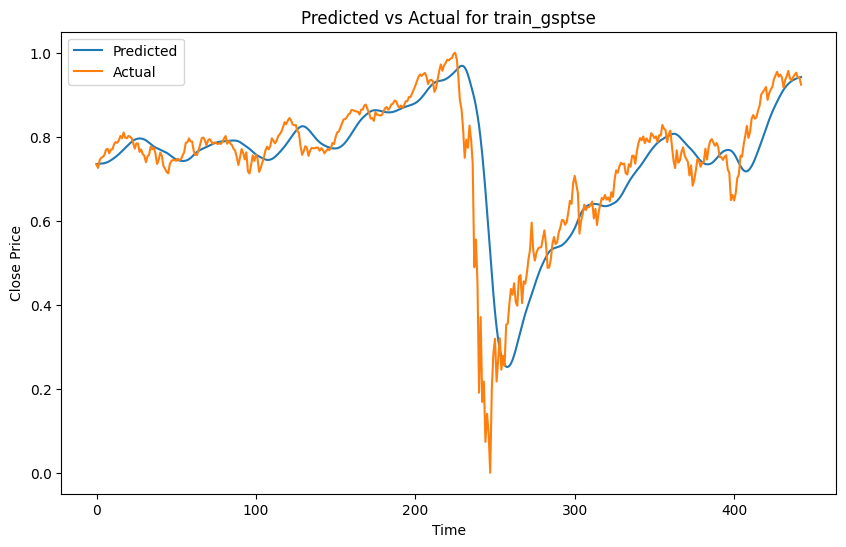

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
from tensorflow.keras.models import load_model

best_model = load_model(data_dir + "/" + "train_gsptse" + "_model.keras")

# Function to make predictions and compare with actual values
def predict_and_compare(model, X_test, y_test, scaler):
    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform the predictions and actual values to the original scale
    predictions = scaler.inverse_transform(np.concatenate((predictions, predictions[:,:1]), axis=1))[:,0] # added this line
    actual_values = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))[:,0]

    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({'Predicted': predictions, 'Actual': actual_values})
    return comparison_df

# Assuming you have trained models stored in the 'history' dictionary and scalers for each stock

# Change the loop to iterate over train_data keys instead of stock_data
for stock_name in train_data:  # Use train_data.keys() or just train_data
    print(f"\nPredictions and Actual Values for {stock_name}:")

    # Get the trained model and scaler for this stock
    best_model = create_lstm_model(train_X[stock_name].shape[1:])  # Define model again with same shape
    best_model.set_weights(history[stock_name].model.get_weights())

    # Preprocess the data again for the correct scaler
    #_, _, scaler = preprocess_data(stock_data[stock_name][['Close']])

    # Get the scaler used during training for this stock
    scaler = MinMaxScaler(feature_range=(0, 1))  # Create a new scaler
    scaler.fit(train_data[stock_name][['Close']])  # Fit it to the training data

    # Make predictions and compare
    comparison_df = predict_and_compare(model, test_X[stock_name], test_y[stock_name], scaler)
    print(comparison_df)

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.plot(comparison_df['Predicted'], label='Predicted')
    plt.plot(comparison_df['Actual'], label='Actual')
    plt.title(f"Predicted vs Actual for {stock_name}")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()